# Mini Project: Logisitic Regression & Support Vector Machine

Team members:
- Harry
- Oscar
- Najeeb
Breast Cancer Wisconsin (Diagnostic) Data Set

## 1. Load Data & Libraries

In [123]:
import pandas as pd
import numpy as np
from __future__ import print_function

df = pd.read_csv('data.csv')

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## 2. Data Preparation

### 2.1 Clean up

In [124]:
if 'id' in df: 
    del df['id']
if 'Unnamed: 32' in df: 
    del df['Unnamed: 32']

In [125]:
df['diagnosis'] = df.diagnosis == 'M'
df.diagnosis = df.diagnosis.astype(np.int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null int64
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 no

In [126]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### 2.2 Data Visualization

(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,
         18.5,  19.5,  20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,
         27.5,  28.5,  29.5,  30.5]), <a list of 31 Text xticklabel objects>)

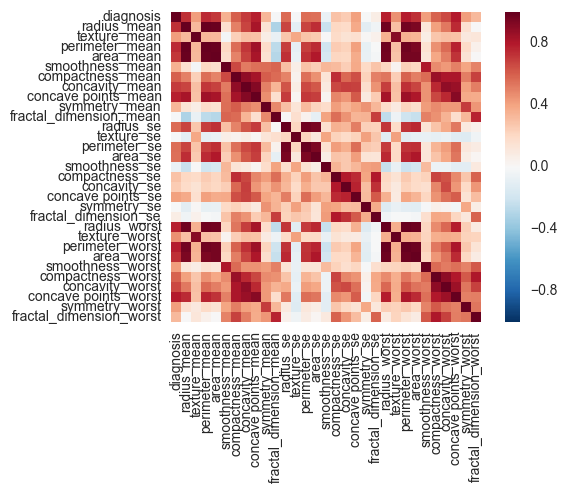

In [127]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# data set and correlation between the variables after cleaning and formatting it

cm = df.corr()
sns.heatmap(cm, square=True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)

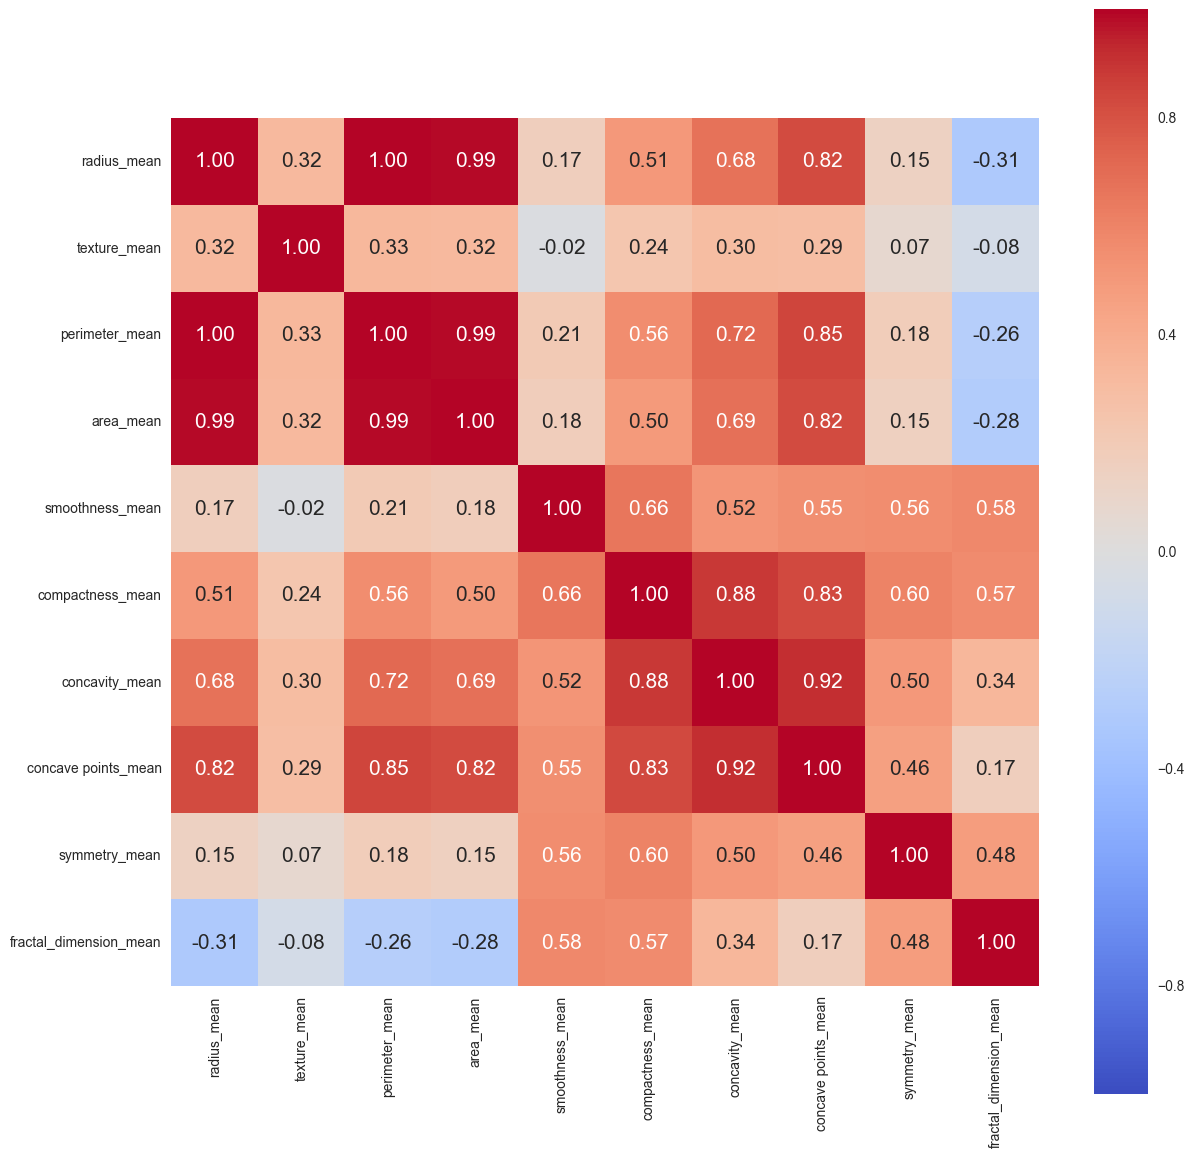

In [128]:
features_mean= list(df.columns[1:11])
features_se= list(df.columns[11:20])
features_worst=list(df.columns[21:31])

corr = df[features_mean].corr() # .corr is used for find corelation
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_mean, yticklabels= features_mean,
           cmap= 'coolwarm')

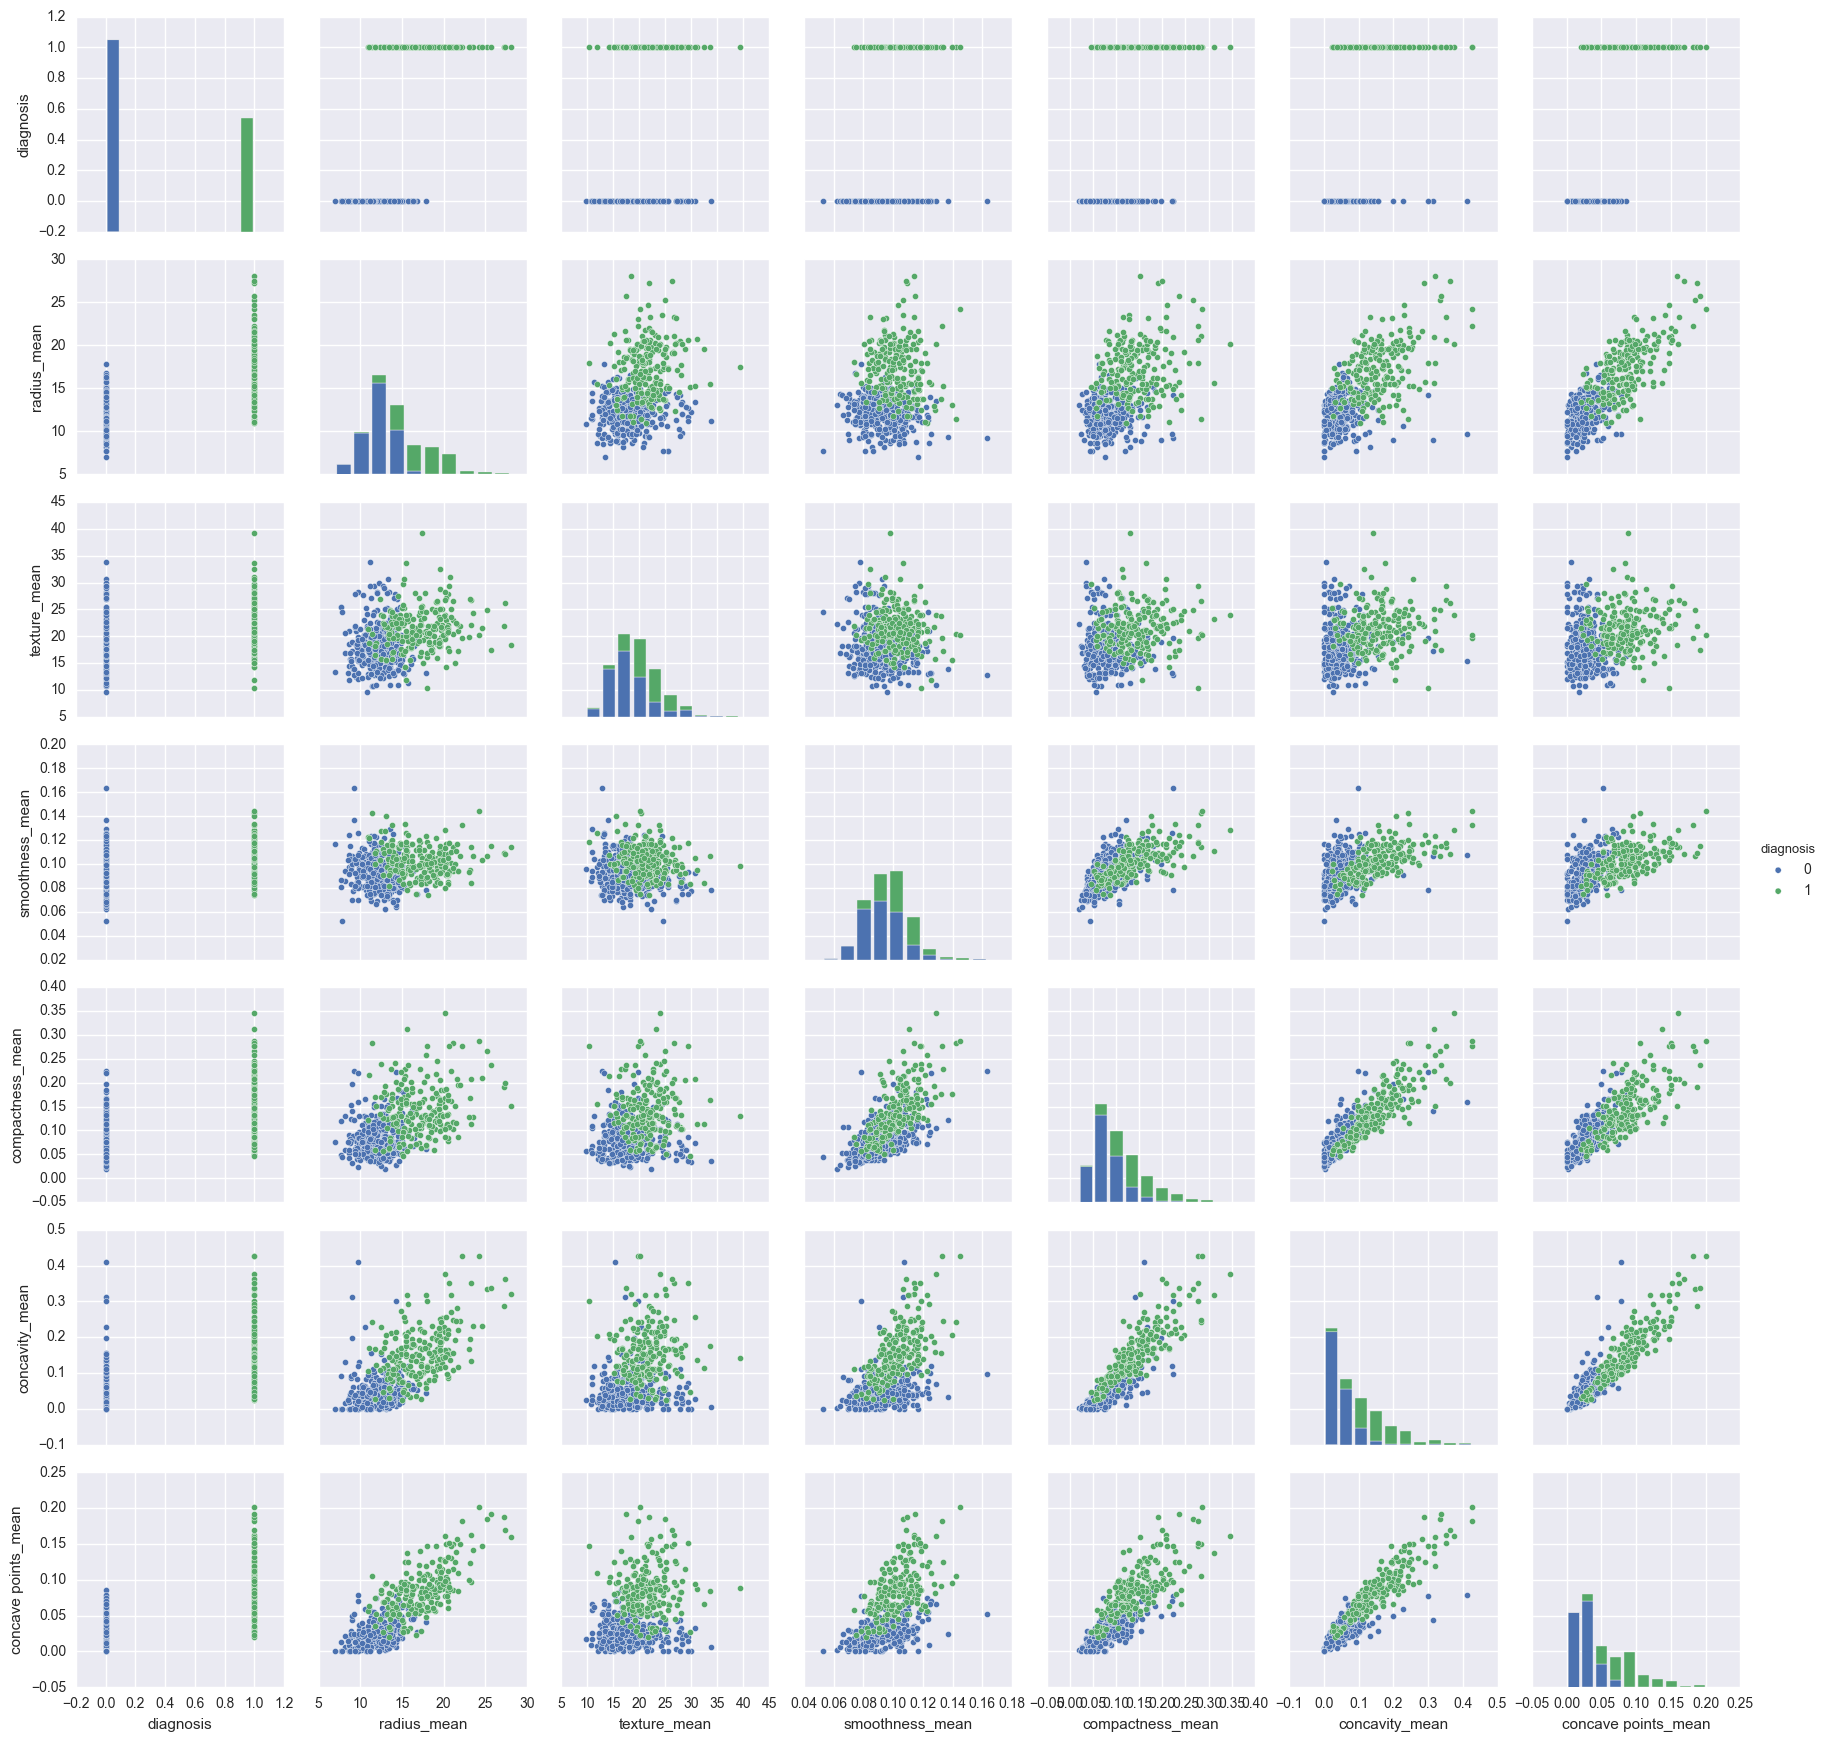

In [129]:
selected_features = ['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean']
g = sns.pairplot(df[selected_features], hue = 'diagnosis')

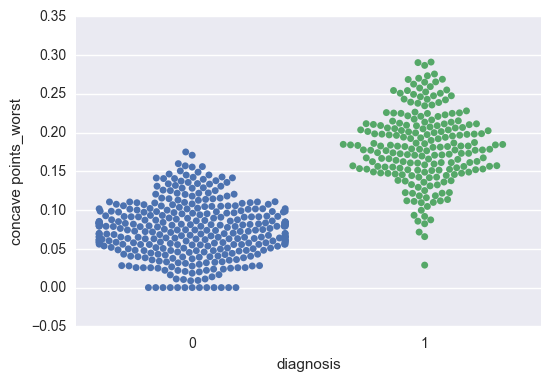

In [130]:
sns.swarmplot(x = 'diagnosis', y = 'concave points_worst', data = df)

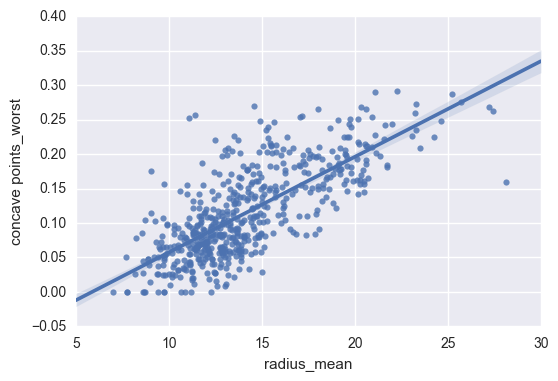

In [131]:
sns.regplot(x = 'radius_mean', y = 'concave points_worst', data = df, scatter = True)

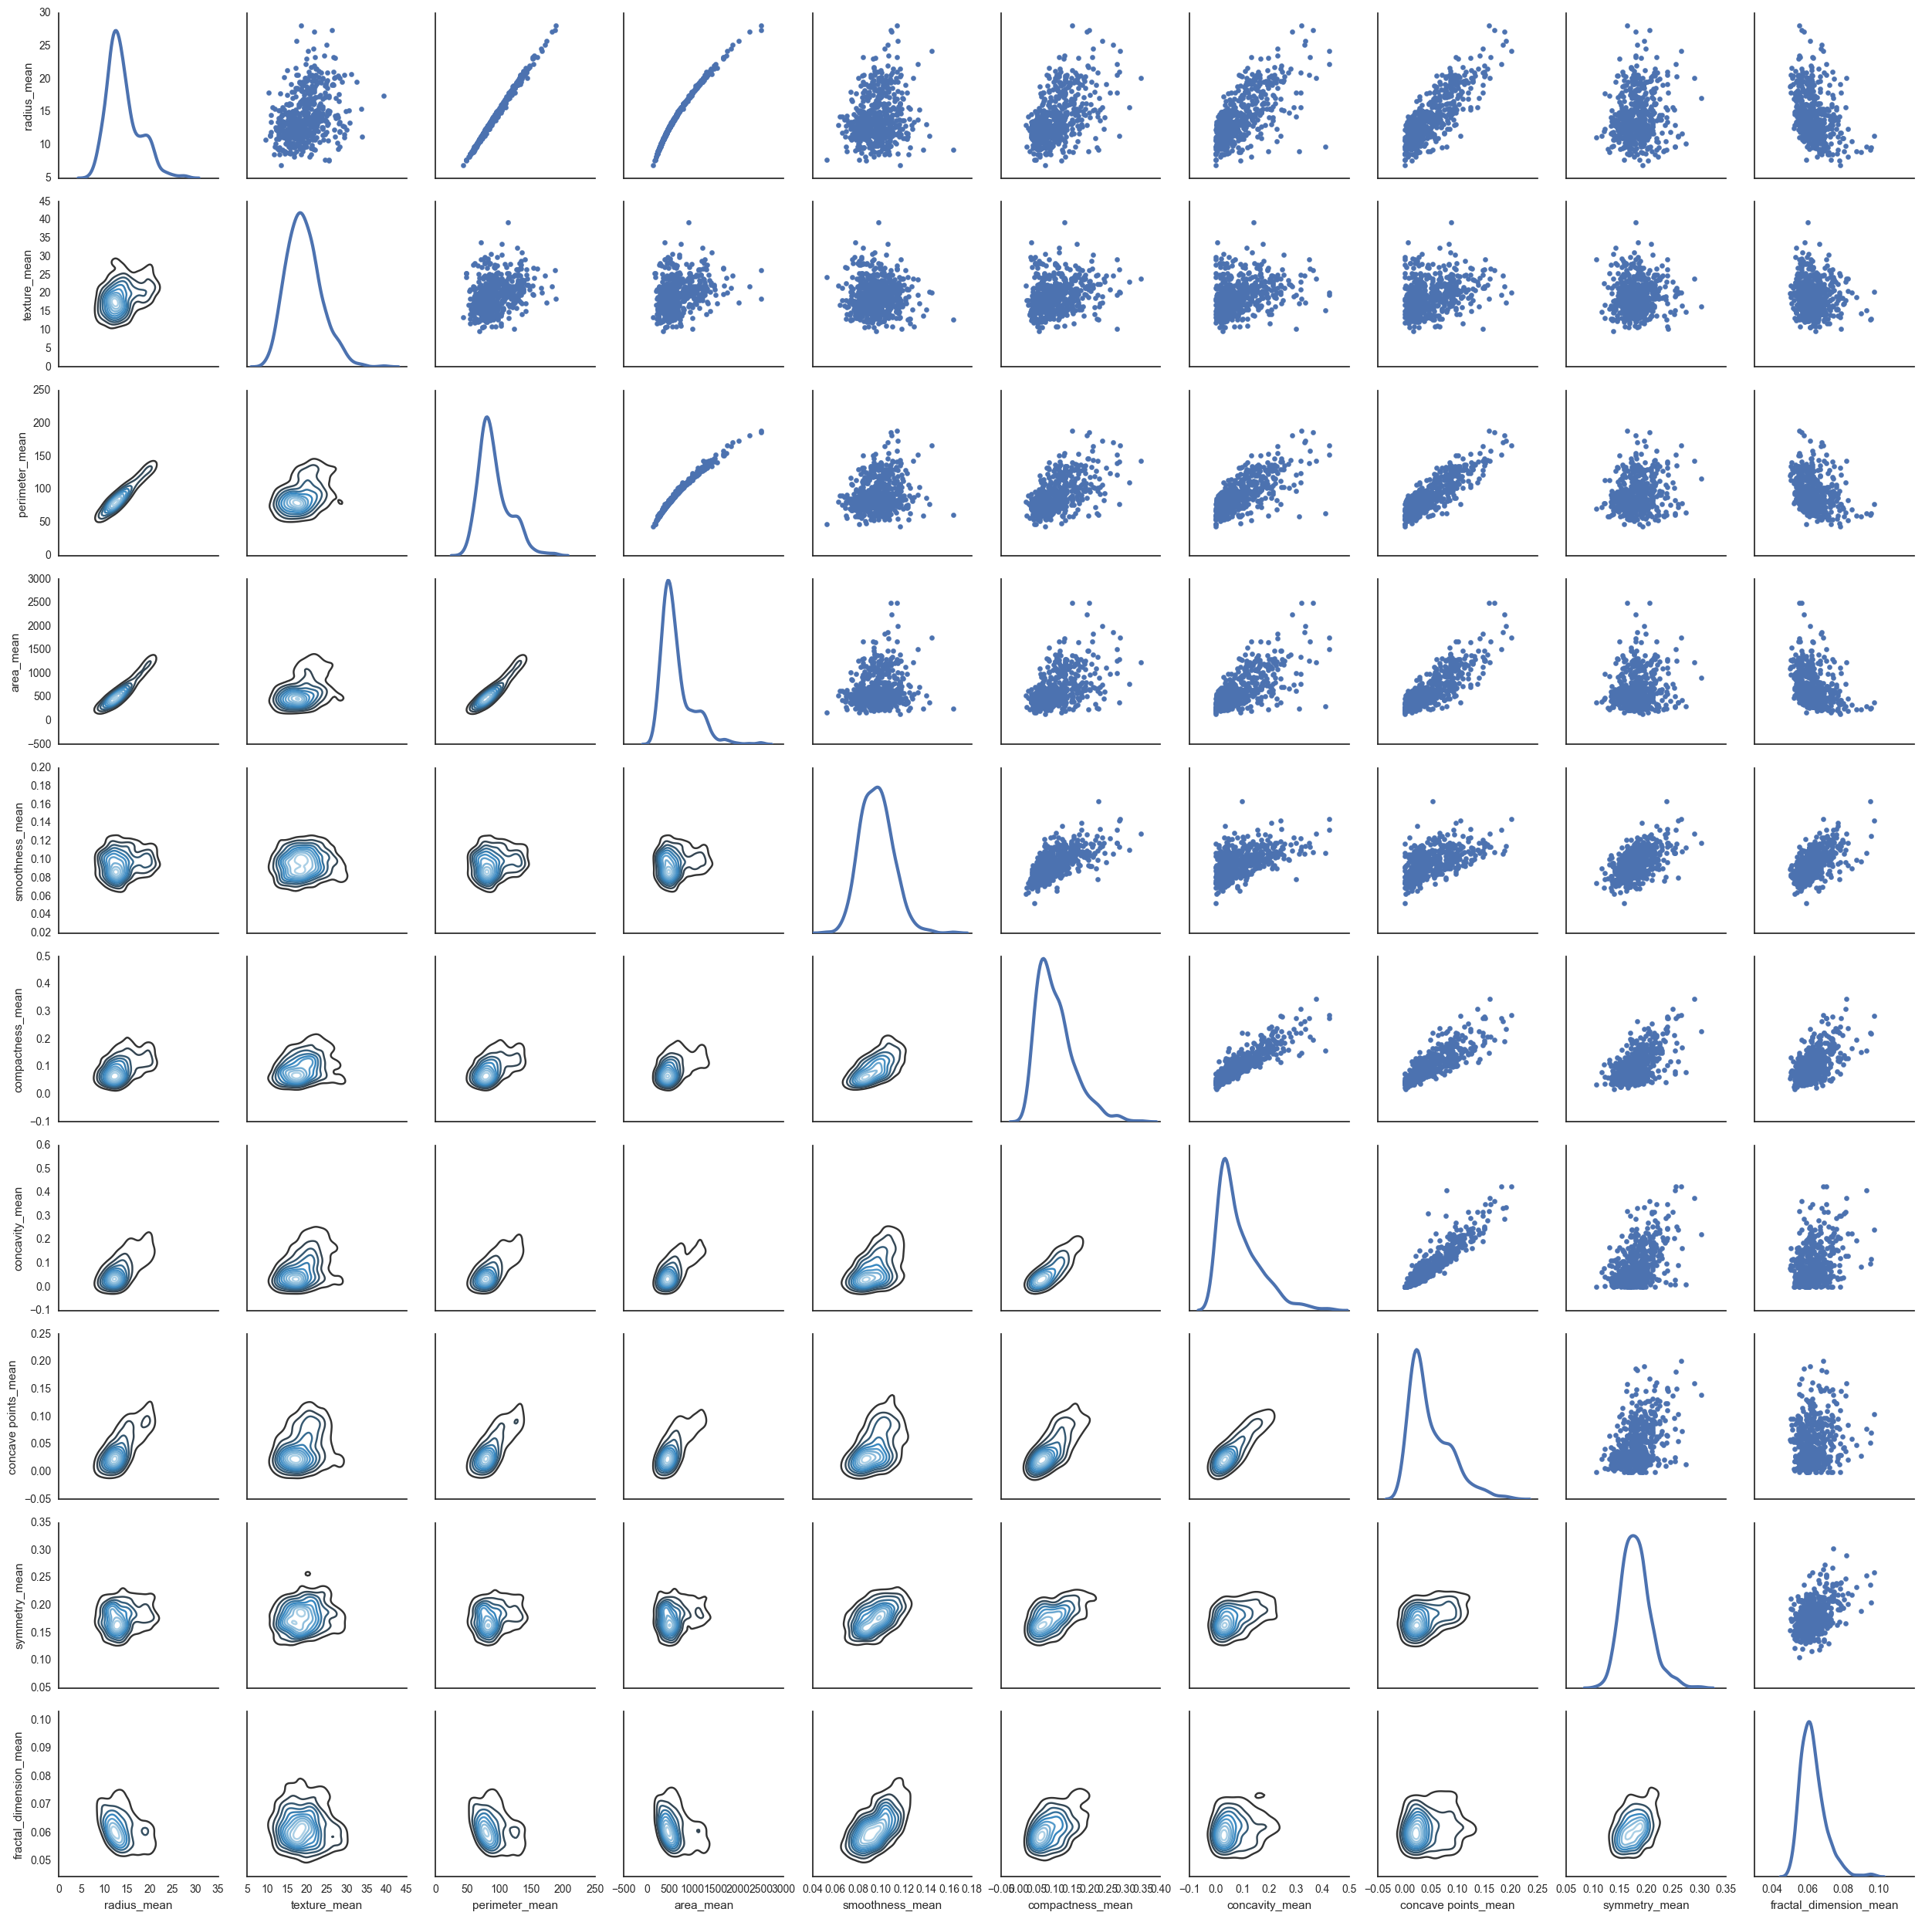

In [132]:
sns.set(style="white")

g = sns.PairGrid(df[features_mean], diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

### 2.3 Training and Testing Split

In [133]:
from sklearn.model_selection import ShuffleSplit

if 'diagnosis' in df:
    y = df['diagnosis'].values
    X = df.ix[:, df.columns != 'diagnosis'].values

In [134]:
num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

ShuffleSplit(n_splits=3, random_state=None, test_size=0.2, train_size=None)


### 2.4 PCA

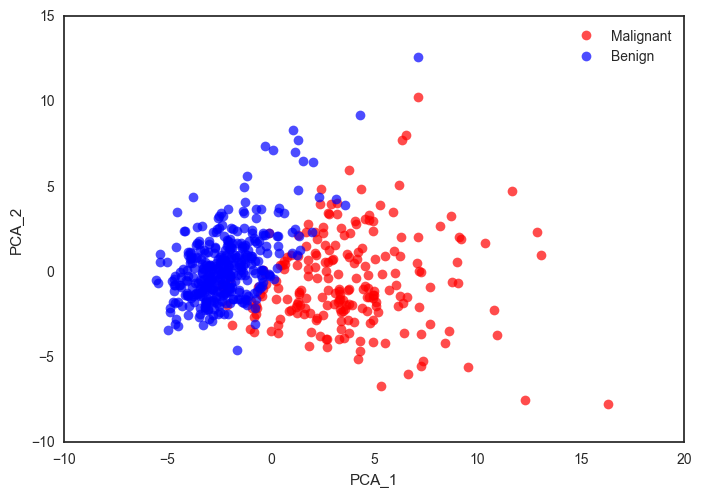

In [141]:
from sklearn.decomposition import PCA

df_std = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
pca.fit(df_std)
TwoD_Data = pca.transform(df_std)
PCA_df = pd.DataFrame()
PCA_df['PCA_1'] = TwoD_Data[:,0]
PCA_df['PCA_2'] = TwoD_Data[:,1]


plt.plot(PCA_df['PCA_1'][df.diagnosis == 1],PCA_df['PCA_2'][df.diagnosis == 1],'o', alpha = 0.7, color = 'r')
plt.plot(PCA_df['PCA_1'][df.diagnosis == 0],PCA_df['PCA_2'][df.diagnosis == 0],'o', alpha = 0.7, color = 'b')
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.legend(['Malignant','Benign'])

## 3. Logistic Regression

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None)

iter_num=0

for train_indices, test_indices in cv_object.split(X,y): 
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]

    lr_clf.fit(X_train,y_train)  # train object
    y_hat = lr_clf.predict(X_test) # get test set precitions
    
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    iter_num+=1

====Iteration 0  ====
accuracy 0.921052631579
confusion matrix
 [[71  5]
 [ 4 34]]
====Iteration 1  ====
accuracy 0.938596491228
confusion matrix
 [[67  4]
 [ 3 40]]
====Iteration 2  ====
accuracy 0.947368421053
confusion matrix
 [[68  2]
 [ 4 40]]


In [143]:
from sklearn.preprocessing import StandardScaler

scl_obj = StandardScaler()
scl_obj.fit(X_train)

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set (without snooping at the test set values)

# train the model just as before
lr_clf = LogisticRegression(penalty='l2', C=0.05) # get object, the 'C' value is less (can you guess why??)
lr_clf.fit(X_train_scaled,y_train)  # train object

y_hat = lr_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf )

# sort these attributes and spit them out
zip_vars = zip(lr_clf.coef_.T, df.ix[:, df.columns != 'diagnosis'].columns) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0]) # now print them out

accuracy: 0.973684210526
[[69  1]
 [ 2 42]]
fractal_dimension_mean has weight of -0.172725359575
fractal_dimension_se has weight of -0.167706460368
compactness_se has weight of -0.155068629333
symmetry_se has weight of -0.0902857820403
concavity_se has weight of -0.0405907697167
compactness_mean has weight of 0.0153479944203
texture_se has weight of 0.0210337563353
smoothness_se has weight of 0.0321564696814
concave points_se has weight of 0.043906469929
symmetry_mean has weight of 0.0894539220075
smoothness_mean has weight of 0.0956160843253
fractal_dimension_worst has weight of 0.107274312066
compactness_worst has weight of 0.146230349142
perimeter_se has weight of 0.236372086226
texture_mean has weight of 0.259774178579
concavity_mean has weight of 0.296768891935
concavity_worst has weight of 0.297877473295
area_se has weight of 0.304707831269
smoothness_worst has weight of 0.309352847418
perimeter_mean has weight of 0.313553687866
radius_mean has weight of 0.322437125262
radius_se 

In [159]:
radius = np.linspace(min(X.PCA_1), max(X.PCA_2), 100)
line = (-lr_clf.coef_[0][0]/lr_clf.coef_[0][1])*radius + np.ones(len(radius))*(-lr_clf.intercept_/lr_clf.coef_[0][1])

plt.plot(radius,line)
plt.plot(PCA_df['PCA_1'][df.diagnosis == 1],PCA_df['PCA_2'][df.diagnosis == 1],'o', alpha = 0.7)
plt.plot(PCA_df['PCA_1'][df.diagnosis == 0],PCA_df['PCA_2'][df.diagnosis == 0],'o', color = 'b', alpha = 0.7)
plt.legend(['Decision Line','Malignant','Benign'])
plt.title('Logistic Regression. Accuracy:' + str(acc)[0:4])
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')

AttributeError: 'numpy.ndarray' object has no attribute 'PCA_1'

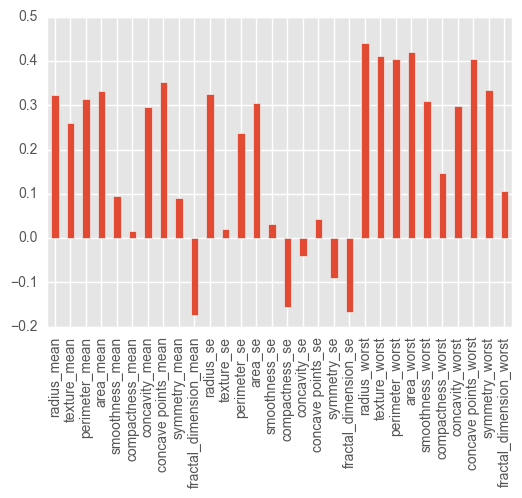

In [144]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


weights = pd.Series(lr_clf.coef_[0], index = df.ix[:, df.columns != 'diagnosis'].columns)
weights.plot(kind = 'bar')
plt.show()

In [145]:
X_train_scaled.shape

(455, 30)

In [146]:
predictor_var = ['radius_mean','area_worst','perimeter_worst','compactness_se','fractal_dimension_se']

X_train_selected = X_train_scaled[:, [1, 24, 23, 16, 20]]
X_test_selected = X_test_scaled[:, [1, 24, 23, 16, 20]]

# train the model just as before
lr_clf = LogisticRegression(penalty='l2', C=0.05) # get object, the 'C' value is less (can you guess why??)
lr_clf.fit(X_train_selected,y_train)  # train object

y_hat = lr_clf.predict(X_test_selected) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf )

# sort these attributes and spit them out
zip_vars = zip(lr_clf.coef_.T, df[predictor_var].columns) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0]) # now print them out

accuracy: 0.964912280702
[[69  1]
 [ 3 41]]
compactness_se has weight of 0.252870413774
radius_mean has weight of 0.457110281103
area_worst has weight of 0.724817083991
perimeter_worst has weight of 1.08996581654
fractal_dimension_se has weight of 1.21525224899


## 4. Support Vector Machines 

In [147]:
for train_indices, test_indices in cv_object.split(X,y): 
    
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) 

In [148]:
from sklearn.svm import SVC

svm_clf = SVC(C=0.5, kernel='linear', degree=3, gamma='auto') # get object
svm_clf.fit(X_train_scaled, y_train)  # train object

y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf)

accuracy: 0.982456140351
[[67  1]
 [ 1 45]]


In [149]:
print(svm_clf.support_vectors_.shape)
print(svm_clf.support_.shape)
print(svm_clf.n_support_ )

(36, 30)
(36,)
[17 19]


[[ 0.21403847  0.34690411  0.22421837  0.31754661  0.00602863 -0.57318973
   0.61057746  0.65625709 -0.08087886 -0.07872052  0.6741555  -0.22761743
   0.42138593  0.61434854  0.11311128 -0.28218979 -0.20636523  0.21180787
  -0.22063978 -0.20844507  0.45651093  0.5947251   0.38552571  0.47663278
   0.55890948 -0.14440341  0.52838526  0.47717065  0.63254889  0.29184887]]


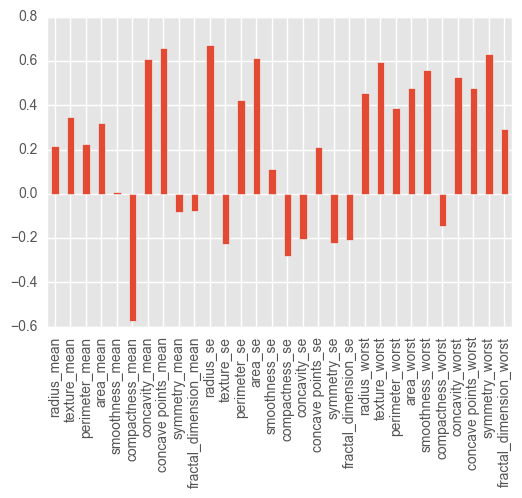

In [150]:
print(svm_clf.coef_)
weights = pd.Series(svm_clf.coef_[0], index = df.ix[:, df.columns != 'diagnosis'].columns)
weights.plot(kind = 'bar')

In [151]:
df_tested_on = df.iloc[train_indices] # saved from above, the indices chosen for training
# now get the support vectors from the trained model
df_support = df_tested_on.iloc[svm_clf.support_,:]
df_support.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 413 to 99
Data columns (total 31 columns):
diagnosis                  36 non-null int64
radius_mean                36 non-null float64
texture_mean               36 non-null float64
perimeter_mean             36 non-null float64
area_mean                  36 non-null float64
smoothness_mean            36 non-null float64
compactness_mean           36 non-null float64
concavity_mean             36 non-null float64
concave points_mean        36 non-null float64
symmetry_mean              36 non-null float64
fractal_dimension_mean     36 non-null float64
radius_se                  36 non-null float64
texture_se                 36 non-null float64
perimeter_se               36 non-null float64
area_se                    36 non-null float64
smoothness_se              36 non-null float64
compactness_se             36 non-null float64
concavity_se               36 non-null float64
concave points_se          36 non-null float64
symm

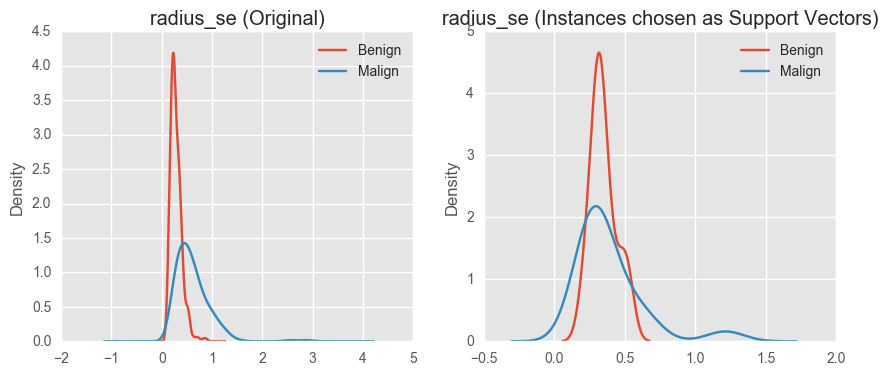

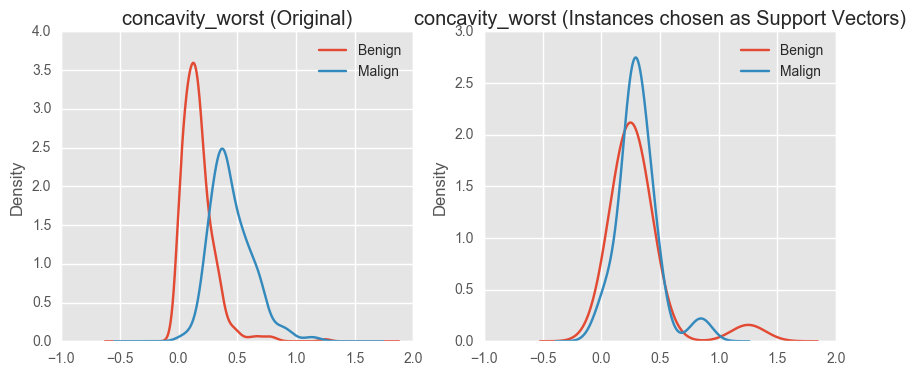

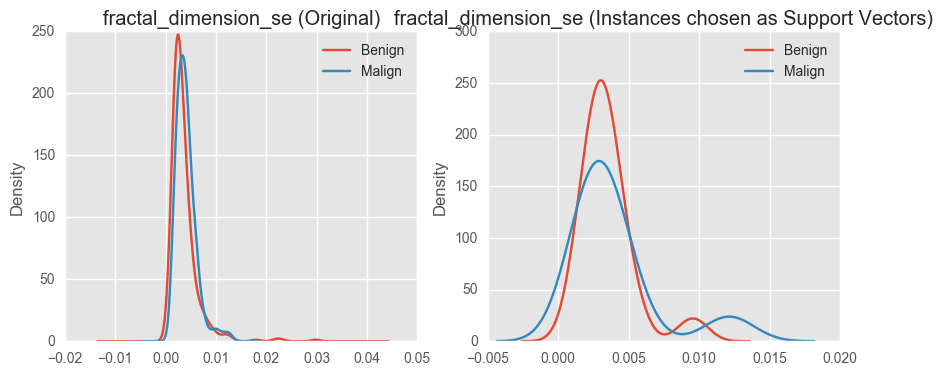

In [152]:
from pandas.tools.plotting import boxplot

# group the original data and the support vectors
df_grouped_support = df_support.groupby(['diagnosis'])
df_grouped = df.groupby(['diagnosis'])

# plot KDE of Different variables
vars_to_plot = ['radius_se','concavity_worst', 'fractal_dimension_se']

for v in vars_to_plot:
    plt.figure(figsize=(10,4))
        
    # plot original distributions
    plt.subplot(1,2,1)
    ax = df_grouped[v].plot.kde()
    plt.legend(['Benign','Malign'])
    plt.title(v+' (Original)')
    
    # plot support vector stats
    plt.subplot(1,2,2)
    ax = df_grouped_support[v].plot.kde() 
    plt.legend(['Benign','Malign'])
    plt.title(v+' (Instances chosen as Support Vectors)')

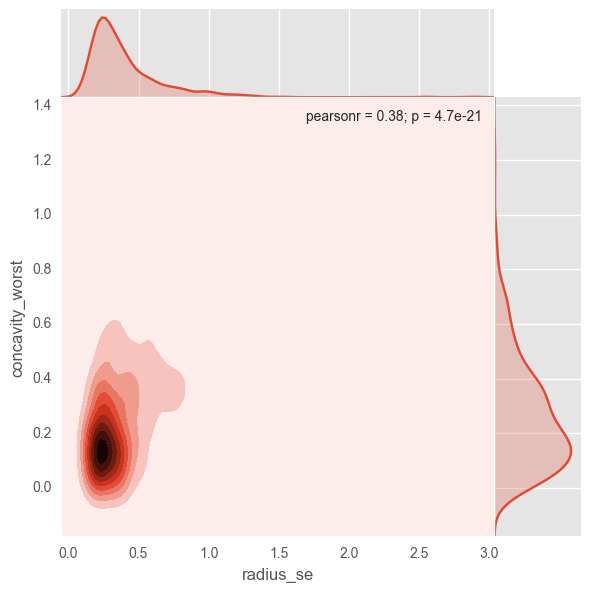

In [153]:
g = sns.jointplot("radius_se", "concavity_worst", data = df, kind = "kde", space = 0, hue = "diagnosis")

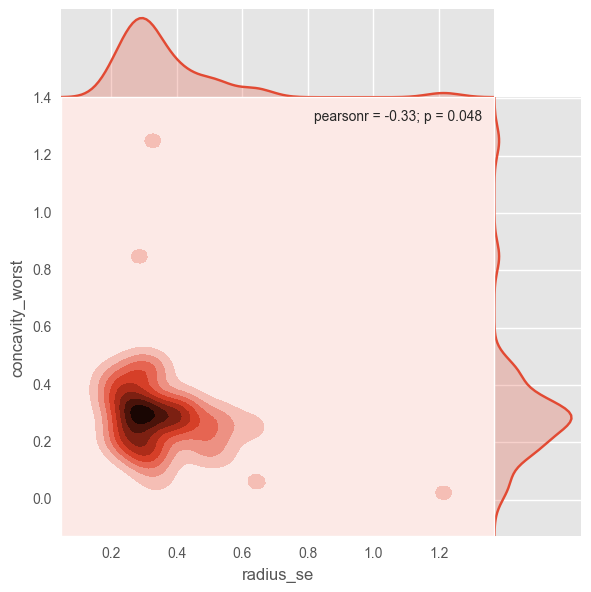

In [154]:
g = sns.jointplot("radius_se", "concavity_worst", data = df_support, kind = "kde", space = 0, hue = "diagnosis")

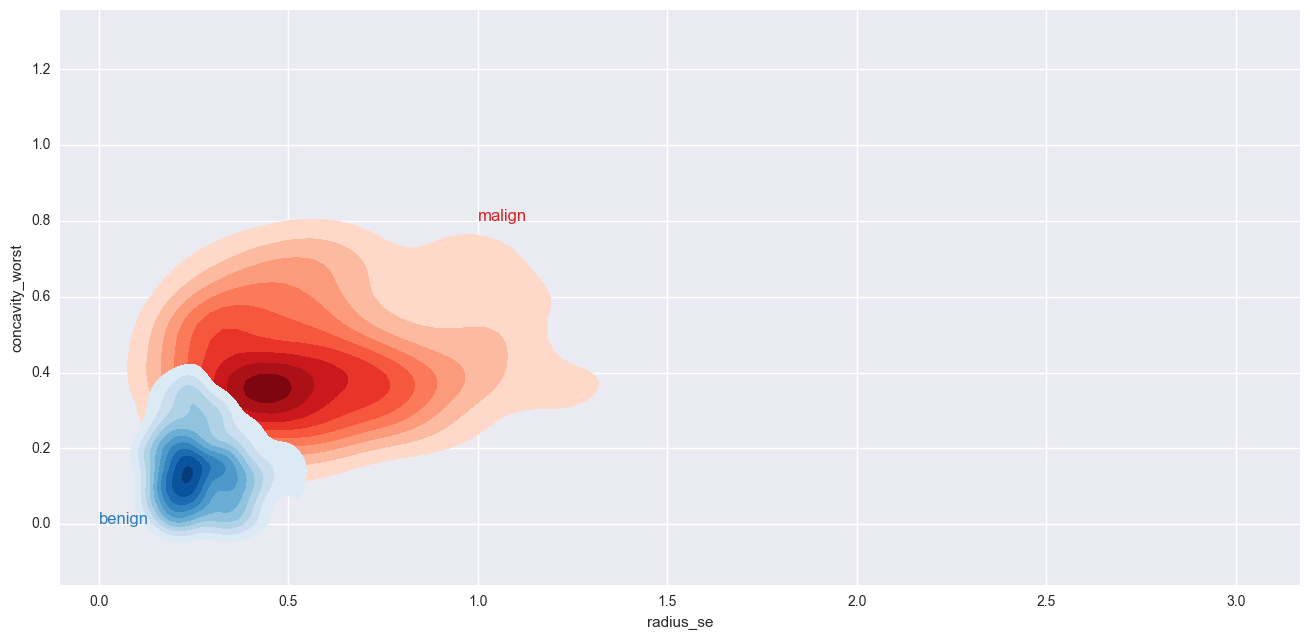

In [155]:
sns.set(style="darkgrid")

malign = df.query("diagnosis == 1")
benign = df.query("diagnosis == 0")

# Set up the figure
f, ax = plt.subplots(figsize=(16, 16))
ax.set_aspect("equal")

# Draw the two density plots
ax = sns.kdeplot(malign.radius_se, malign.concavity_worst,
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(benign.radius_se, benign.concavity_worst,
                 cmap="Blues", shade=True, shade_lowest=False)

# Add labels to the plot
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
ax.text(0, 0, "benign", size=12, color=blue)
ax.text(1, 0.8, "malign", size=12, color=red)

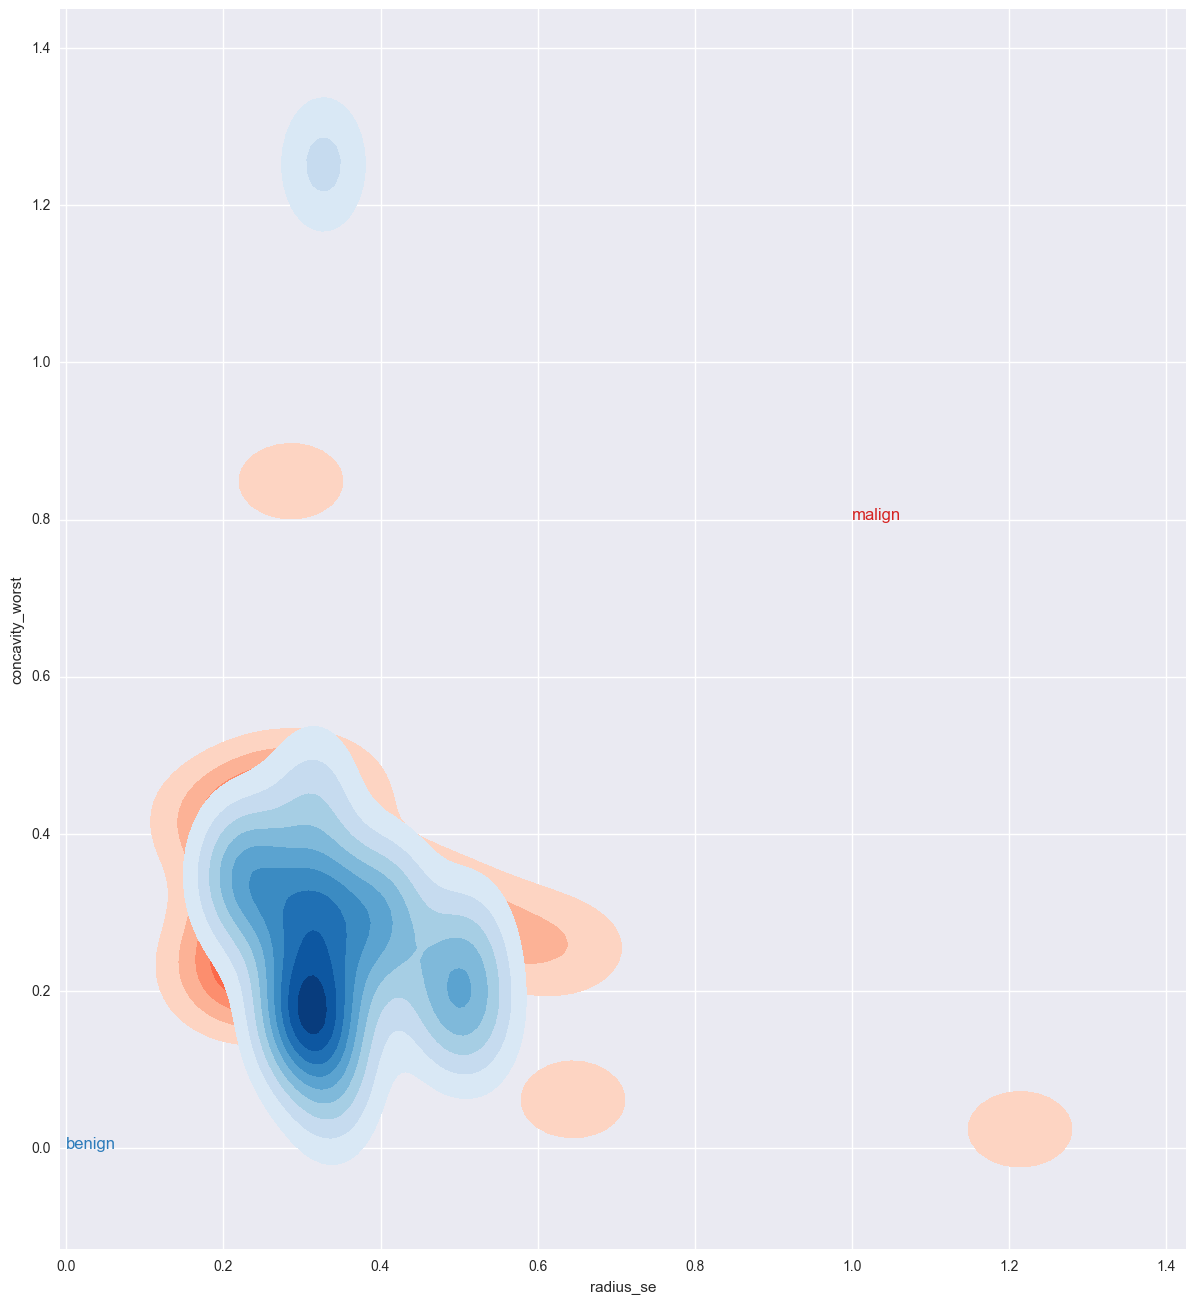

In [156]:
sns.set(style="darkgrid")

malign = df_support.query("diagnosis == 1")
benign = df_support.query("diagnosis == 0")

# Set up the figure
f, ax = plt.subplots(figsize=(16, 16))
ax.set_aspect("equal")

# Draw the two density plots
ax = sns.kdeplot(malign.radius_se, malign.concavity_worst,
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(benign.radius_se, benign.concavity_worst,
                 cmap="Blues", shade=True, shade_lowest=False)

# Add labels to the plot
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
ax.text(0, 0, "benign", size=12, color=blue)
ax.text(1, 0.8, "malign", size=12, color=red)

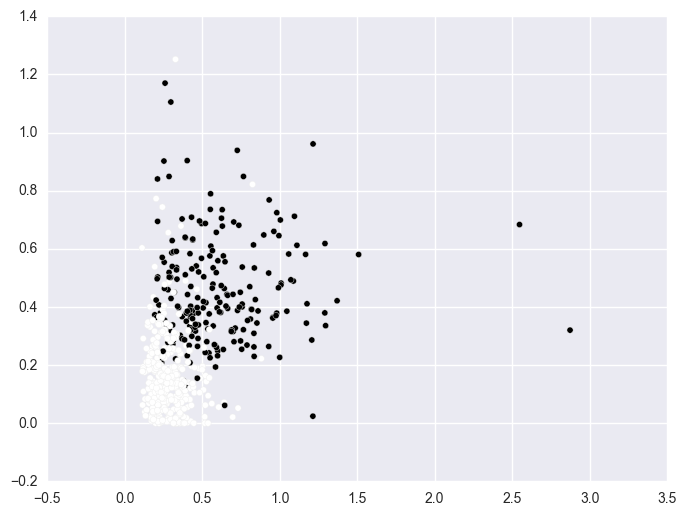

In [157]:
from pylab import *

plt.figure(figsize=(8, 6))
plt.scatter(df.radius_se, df.concavity_worst, c=df.diagnosis.astype(np.float))
plt.show()

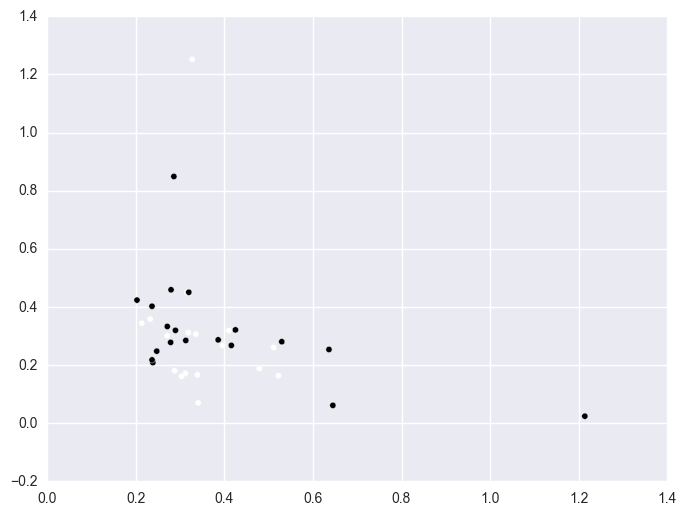

In [158]:
from pylab import *

plt.figure(figsize=(8, 6))
plt.scatter(df_support.radius_se, df_support.concavity_worst, c=df_support.diagnosis.astype(np.float))
plt.show()